# Dementia Prediction Project  
Sarah Spalding  
Goal: The goal of this project is to analyze an existing dataset comparing individuals with and without dementia and to predict the likelihood of dementia in other individuals based off of this dataset

In [1]:
# import libraries
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Exploratory Data Analysis with SQL
Goal: get a general feel for the data and trends

In [2]:
# connect to database and create a new dataframe to manipulate
conn = sqlite3.connect("Dementia.db")
query = 'SELECT * FROM datawrangled'
data_explore = pd.read_sql(query, conn)

In [3]:
data_explore.head()

,level_0,index,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,2,2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,1,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,3,3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,1,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,4,4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,1,80,12,2.0,22.0,0.5,1698,0.701,1.034


In [4]:
# display the average age of the patients
pd.read_sql('select avg("Age") as Average_Age from datawrangled', conn)

,Average_Age
0,77.013405


In [5]:
# determine the number of patients with dementia, without dementia, and converted
pd.read_sql('select "Group", count(distinct("Subject ID")) as "Number_Patients" from datawrangled group by "Group";', conn)

,Group,Number_Patients
0,Demented,78
1,Nondemented,86


In [6]:
pd.read_sql('select * from datawrangled where "Group" = "Converted";', conn)

,level_0,index,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF


In [7]:
# determine the number of patients in the study
pd.read_sql('select count(distinct("Subject ID")) as "Number_Patients" from datawrangled;', conn)

,Number_Patients
0,150


In [8]:
# Determine the average, maximum, and minumum MMSE of the study
pd.read_sql('select avg(MMSE) as "Average_MMSE", max(MMSE) as "Max_MMSE", min(MMSE) as "Min_MMSE" from datawrangled;', conn)

,Average_MMSE,Max_MMSE,Min_MMSE
0,27.340483,30.0,4.0


In [9]:
# Determine the average, maximum, and minumum CDR of the study
pd.read_sql('select avg(CDR) as "Average_CDR", max(CDR) as "Max_CDR", min(CDR) as "Min_CDR" from datawrangled;', conn)

,Average_CDR,Max_CDR,Min_CDR
0,0.290885,2.0,0.0


In [10]:
# determine the number of male and female patients in the study
pd.read_sql('select "M/F", count(distinct("Subject ID")) as "Number_Patients" from datawrangled group by "M/F";', conn)

,M/F,Number_Patients
0,0,88
1,1,62


In [11]:
# maximum number of patient visits
pd.read_sql('select max("Visit") as "Max_Visits" from datawrangled;', conn)

,Max_Visits
0,5


In [12]:
# group data by visit number
pd.read_sql('select * from datawrangled where "Visit" = 1;', conn)

,level_0,index,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,2,2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,1,75,12,2.0,23.0,0.5,1678,0.736,1.046
2,5,5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,0,88,18,3.0,28.0,0.0,1215,0.710,1.444
3,7,7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,1,80,12,4.0,28.0,0.0,1689,0.712,1.039
4,10,10,OAS2_0007,OAS2_0007_MR1,Demented,1,0,1,71,16,2.0,28.0,0.5,1357,0.748,1.293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,359,359,OAS2_0182,OAS2_0182_MR1,Demented,1,0,1,73,12,2.0,23.0,0.5,1661,0.698,1.056
146,361,361,OAS2_0183,OAS2_0183_MR1,Nondemented,1,0,0,66,13,2.0,30.0,0.0,1495,0.746,1.174
147,365,365,OAS2_0184,OAS2_0184_MR1,Demented,1,0,0,72,16,3.0,24.0,0.5,1354,0.733,1.296
148,367,367,OAS2_0185,OAS2_0185_MR1,Demented,1,0,1,80,16,1.0,28.0,0.5,1704,0.711,1.030


In [13]:
# determine the number of male patients in the study with Dementia
male_data = pd.read_sql('select count(distinct("Subject ID")) as "Number_Patients_Male", "Group" from datawrangled where "M/F" = 1 group by "Group";', conn)
male_data

,Number_Patients_Male,Group
0,40,Demented
1,26,Nondemented


In [14]:
# determine the number of Female patients in the study with Dementia
female_data = pd.read_sql('select count(distinct("Subject ID")) as "Number_Patients_Female", "Group" from datawrangled where "M/F" = "0" group by "Group";', conn)

In [15]:
# function to get percentages
# Numbers is subest of one of the columns that you are interested in having a percent of
# Total is the total of that subset
def MakePercentages(Numbers,Total):
    percentages = [(elem/Total)*100 for elem in Numbers]
    return pd.DataFrame({'Percentages':percentages,'Group':['Demented','Nondemented']})

In [16]:
# calculate percentage of males with and without dementia and compare
number_males = pd.read_sql('select count(distinct("Subject ID")) as "Number_Patients" from datawrangled where "M/F" = "1";', conn).at[0,'Number_Patients']
male_data_percentages_df = MakePercentages(male_data['Number_Patients_Male'],number_males)
male_data_percentages_df

,Percentages,Group
0,64.516129,Demented
1,41.935484,Nondemented


In [17]:
# calculate the percentage of females with and without dementia
number_females = pd.read_sql('select count(distinct("Subject ID")) as "Number_Patients" from datawrangled where "M/F" = "0";', conn).at[0,'Number_Patients']
female_data_percentages_df = MakePercentages(female_data['Number_Patients_Female'],number_females)
female_data_percentages_df

,Percentages,Group
0,43.181818,Demented
1,68.181818,Nondemented


### Scatter Plots

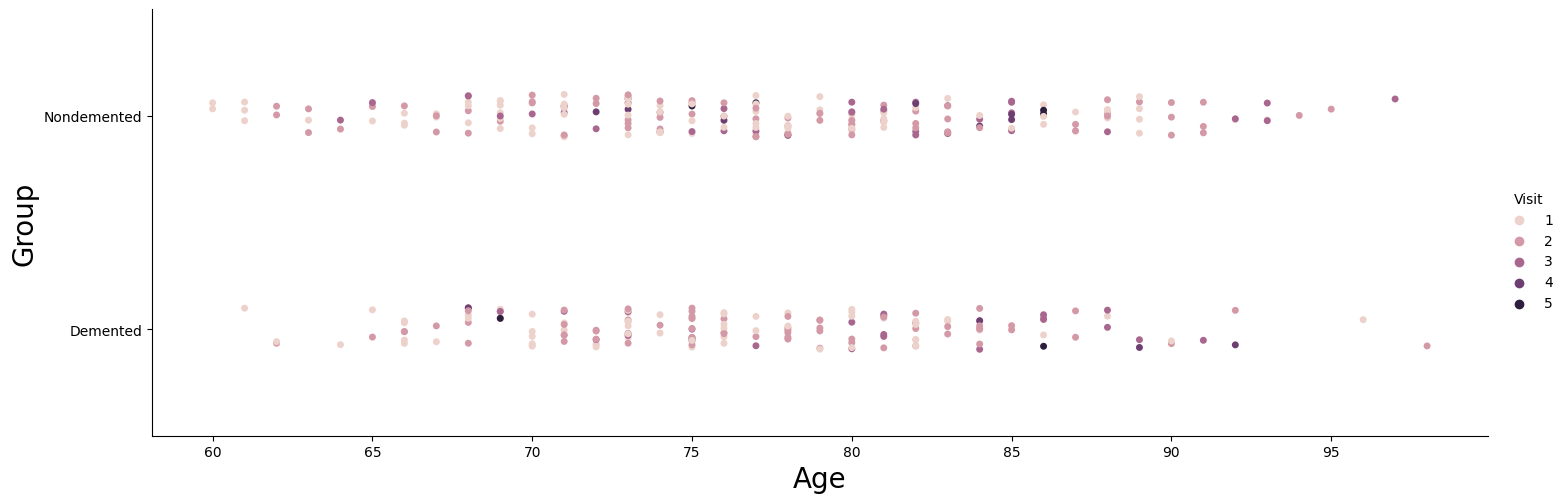

In [18]:
# Age vs Group with the legend showing visit number
age_v_group = pd.read_sql('select "Group", "Age", "Visit" from datawrangled;', conn)
sns.catplot(y='Group', x='Age', hue='Visit', data=age_v_group, aspect=3)
plt.xlabel('Age', fontsize = 20)
plt.ylabel('Group', fontsize = 20)
plt.show()


### Correlation between Variables

In [19]:
# use correlation function to find correlation between variables (1 = stong positive, -1 = strong negative, 0 = none)
data_explore[['M/F','MR Delay','Age','EDUC','SES','MMSE','CDR','eTIV','nWBV','ASF','Group']].corr()

,M/F,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
M/F,1.000000,0.048006,-0.037726,0.089279,-0.048504,-0.166084,0.202140,0.572549,-0.249618,-0.561647
MR Delay,0.048006,1.000000,0.205357,0.051630,-0.026247,0.065604,-0.062915,0.119624,-0.105586,-0.123545
Age,-0.037726,0.205357,1.000000,-0.027886,-0.045410,0.055672,-0.026257,0.042348,-0.518359,-0.035067
EDUC,0.089279,0.051630,-0.027886,1.000000,-0.691222,0.194902,-0.153121,0.257015,-0.012200,-0.241752
SES,-0.048504,-0.026247,-0.045410,-0.691222,1.000000,-0.138862,0.052313,-0.249030,0.092361,0.240831
MMSE,-0.166084,0.065604,0.055672,0.194902,-0.138862,1.000000,-0.680769,-0.030866,0.341742,0.038359
CDR,0.202140,-0.062915,-0.026257,-0.153121,0.052313,-0.680769,1.000000,0.022819,-0.344819,-0.029340
eTIV,0.572549,0.119624,0.042348,0.257015,-0.249030,-0.030866,0.022819,1.000000,-0.210122,-0.988877
nWBV,-0.249618,-0.105586,-0.518359,-0.012200,0.092361,0.341742,-0.344819,-0.210122,1.000000,0.213476
ASF,-0.561647,-0.123545,-0.035067,-0.241752,0.240831,0.038359,-0.029340,-0.988877,0.213476,1.000000


In [20]:
data_explore.describe()

,level_0,index,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,186.000000,186.000000,1.882038,595.104558,0.428954,77.013405,14.597855,2.436997,27.340483,0.290885,1488.128686,0.729568,1.195461
std,107.820066,107.820066,0.922843,635.485118,0.495592,7.640957,2.876339,1.109307,3.673415,0.374557,176.139286,0.037135,0.138092
min,0.000000,0.000000,1.000000,0.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,93.000000,93.000000,1.000000,0.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,186.000000,186.000000,2.000000,552.000000,0.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,279.000000,279.000000,2.000000,873.000000,1.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,372.000000,372.000000,5.000000,2639.000000,1.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


### Box Plots

<AxesSubplot:xlabel='Group', ylabel='CDR'>

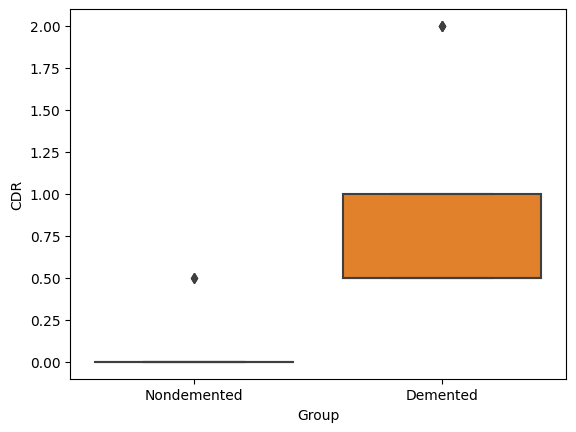

In [21]:
# box plot to visualize group and CDR
sns.boxplot(x = 'Group', y = 'CDR', data = data_explore)

<AxesSubplot:xlabel='Group', ylabel='MMSE'>

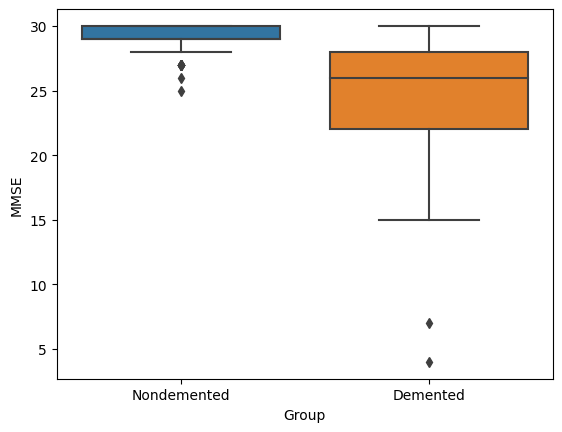

In [22]:
# box plot to visualize group and MMSE
sns.boxplot(x = 'Group', y = 'MMSE', data = data_explore)

<AxesSubplot:xlabel='Group', ylabel='Age'>

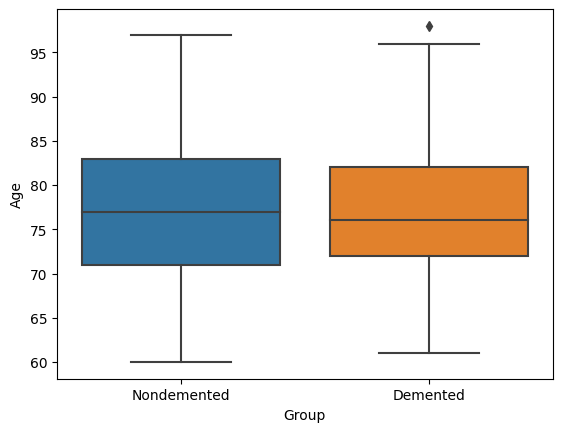

In [23]:
# box plot of group vs age
sns.boxplot(x = 'Group', y = 'Age', data = data_explore)

<AxesSubplot:xlabel='Group', ylabel='nWBV'>

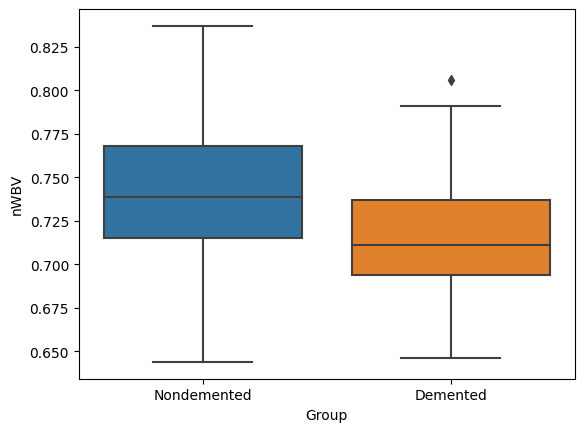

In [24]:
# box plot of group vs age
sns.boxplot(x = 'Group', y = 'nWBV', data = data_explore)

### Histograms

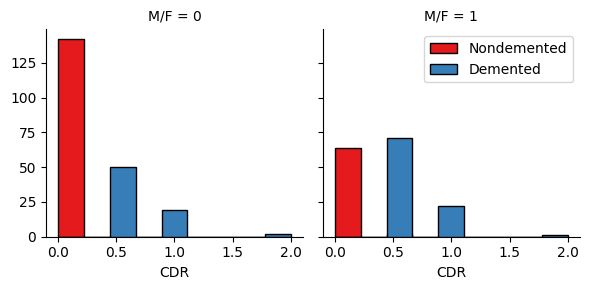

In [25]:
# Histogram showing the frequency of CDR with each group for the two sexs
bins = np.linspace(data_explore.CDR.min(), data_explore.CDR.max(), 10)
g = sns.FacetGrid(data_explore, col="M/F", hue="Group", palette="Set1", col_wrap=2)
g.map(plt.hist, 'CDR', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

<AxesSubplot:xlabel='EDUC', ylabel='Count'>

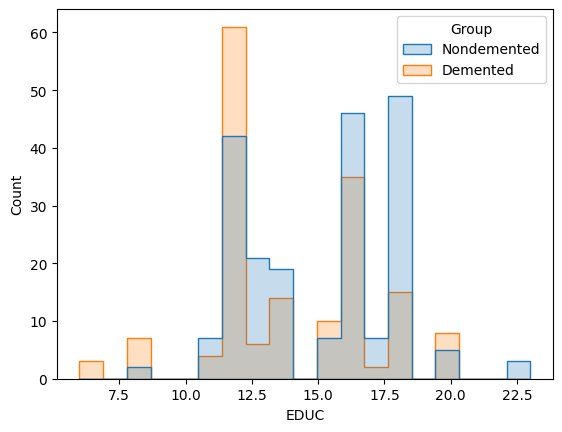

In [26]:
# histogram for frquency of education for the 3 group
bins = np.linspace(data_explore.EDUC.min(), data_explore.EDUC.max(), 20)
sns.histplot(data_explore, x='EDUC',hue = 'Group', bins = bins, element = 'step',legend=True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

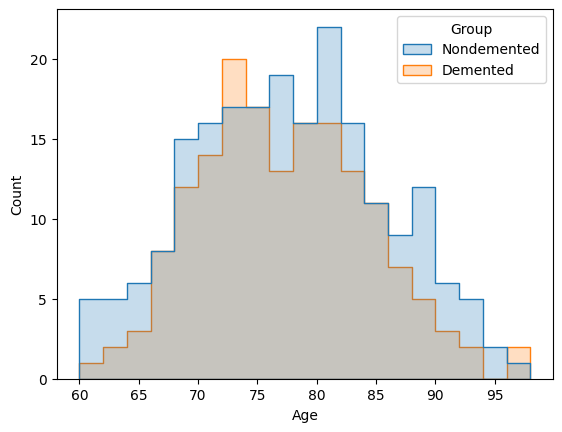

In [27]:
# histogram for frquency of ages for the 3 group
bins = np.linspace(data_explore.Age.min(), data_explore.Age.max(), 20)
sns.histplot(data_explore, x='Age',hue = 'Group', bins = bins, element = 'step',legend=True)

<AxesSubplot:xlabel='SES', ylabel='Count'>

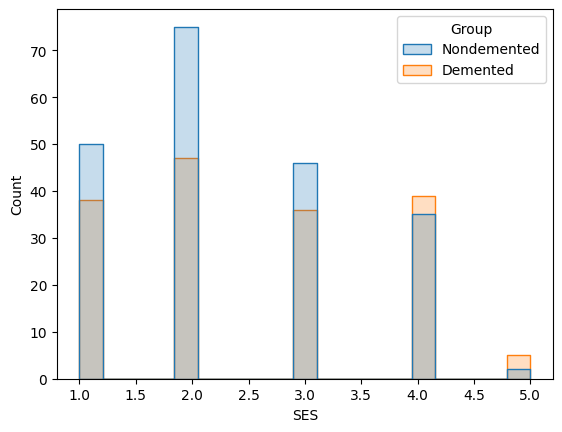

In [28]:
# histogram for frquency of SES for the 3 group
bins = np.linspace(data_explore.SES.min(), data_explore.SES.max(), 20)
sns.histplot(data_explore, x='SES',hue = 'Group', bins = bins, element = 'step',legend=True)

<AxesSubplot:xlabel='eTIV', ylabel='Count'>

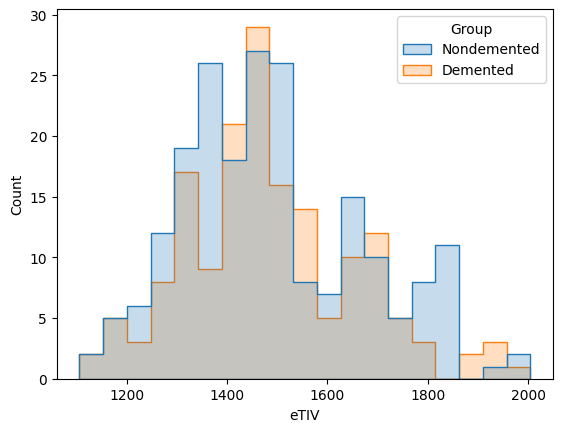

In [29]:
# histogram for frquency of eTIV for the 3 group
bins = np.linspace(data_explore.eTIV.min(), data_explore.eTIV.max(), 20)
sns.histplot(data_explore, x='eTIV',hue = 'Group', bins = bins, element = 'step',legend=True)

<AxesSubplot:xlabel='nWBV', ylabel='Count'>

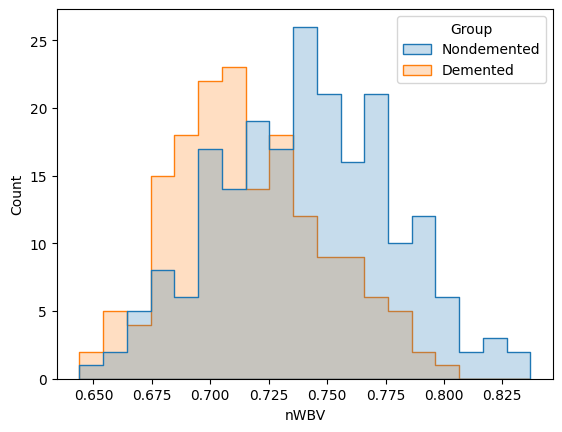

In [30]:
# histogram for frquency of nWBV for the 3 group
bins = np.linspace(data_explore.nWBV.min(), data_explore.nWBV.max(), 20)
sns.histplot(data_explore, x='nWBV',hue = 'Group', bins = bins, element = 'step',legend=True)

<AxesSubplot:xlabel='ASF', ylabel='Count'>

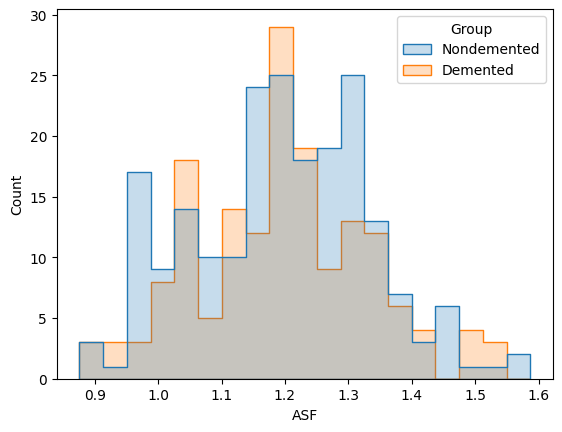

In [31]:
# histogram for frquency of ASF for the 3 group
bins = np.linspace(data_explore.ASF.min(), data_explore.ASF.max(), 20)
sns.histplot(data_explore, x='ASF',hue = 'Group', bins = bins, element = 'step',legend=True)

<AxesSubplot:xlabel='MR Delay', ylabel='Count'>

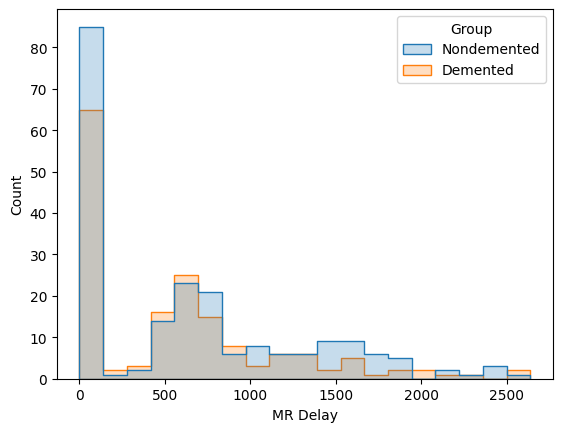

In [32]:
# histogram for frquency of MR DELAY for the 3 group
bins = np.linspace(data_explore['MR Delay'].min(), data_explore['MR Delay'].max(), 20)
sns.histplot(data_explore, x='MR Delay',hue = 'Group', bins = bins, element = 'step',legend=True)

<AxesSubplot:xlabel='Visit', ylabel='Count'>

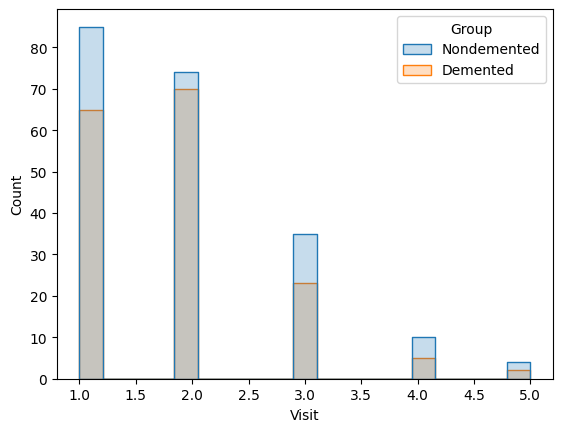

In [33]:
# Did dementia worsen over the visits?
bins = np.linspace(data_explore.Visit.min(), data_explore.Visit.max(), 20)
sns.histplot(data_explore, x='Visit',hue = 'Group', bins = bins, element = 'step',legend=True)
# this is not the most accurate representation, would need to divide by the total number of patients at each visit

### Statistical Analysis

In [34]:
# table of p values
df_pvalues = pd.DataFrame({'Comparison':['Demented v NonDemented']})

# table of f values
df_fvalues = pd.DataFrame({'Comparison':['Demented v NonDemented']})

In [35]:
# Anova test function - compare all groups
def TotalAnova (Group1,Group2,ColumnName):
    f_val, p_val = stats.f_oneway(Group1,Group2)  
    if p_val < 0.05:
        print("The P Value is less than alpha, therefore the null hypothesis is rejected and the groups are significantly different")
        print( "ANOVA results: F=", f_val, ", P =", p_val)
    else:
        print("The P Value is greater than alpha, therefore the null hypothesis is not rejected and the groups are not significantly different")
        print( "ANOVA results: F=", f_val, ", P =", p_val)
    
    pvalues = [p_val]
    df_pvalues[ColumnName]=pvalues
    fvalues = [f_val]
    df_fvalues[ColumnName] = fvalues
    return df_fvalues, df_pvalues

In [36]:
# Anova test on nWBV
grouped_test=data_explore[['Group', 'nWBV']].groupby(['Group'])
TotalAnova(grouped_test.get_group('Demented')['nWBV'], grouped_test.get_group('Nondemented')['nWBV'],'nWBV')

The P Value is less than alpha, therefore the null hypothesis is rejected and the groups are significantly different
ANOVA results: F= 44.69556073778107 , P = 8.473468382508532e-11


(               Comparison       nWBV
 0  Demented v NonDemented  44.695561,
                Comparison          nWBV
 0  Demented v NonDemented  8.473468e-11)

In [37]:
# Anova test on eTIV
grouped_test=data_explore[['Group', 'eTIV']].groupby(['Group'])
TotalAnova(grouped_test.get_group('Demented')['eTIV'], grouped_test.get_group('Nondemented')['eTIV'],'eTIV')

The P Value is greater than alpha, therefore the null hypothesis is not rejected and the groups are not significantly different
ANOVA results: F= 0.026853574852258078 , P = 0.8699222437900392


(               Comparison       nWBV      eTIV
 0  Demented v NonDemented  44.695561  0.026854,
                Comparison          nWBV      eTIV
 0  Demented v NonDemented  8.473468e-11  0.869922)

In [38]:
# Anova test on ASF
grouped_test=data_explore[['Group', 'ASF']].groupby(['Group'])
TotalAnova(grouped_test.get_group('Demented')['ASF'], grouped_test.get_group('Nondemented')['ASF'],'ASF')

The P Value is greater than alpha, therefore the null hypothesis is not rejected and the groups are not significantly different
ANOVA results: F= 0.0015318986137518714 , P = 0.968800240071678


(               Comparison       nWBV      eTIV       ASF
 0  Demented v NonDemented  44.695561  0.026854  0.001532,
                Comparison          nWBV      eTIV     ASF
 0  Demented v NonDemented  8.473468e-11  0.869922  0.9688)

In [39]:
# Anova test on EDUC
grouped_test=data_explore[['Group', 'EDUC']].groupby(['Group'])
TotalAnova(grouped_test.get_group('Demented')['EDUC'], grouped_test.get_group('Nondemented')['EDUC'],'EDUC')

The P Value is less than alpha, therefore the null hypothesis is rejected and the groups are significantly different
ANOVA results: F= 16.76401966290004 , P = 5.198520979541356e-05


(               Comparison       nWBV      eTIV       ASF      EDUC
 0  Demented v NonDemented  44.695561  0.026854  0.001532  16.76402,
                Comparison          nWBV      eTIV     ASF      EDUC
 0  Demented v NonDemented  8.473468e-11  0.869922  0.9688  0.000052)

In [40]:
# Anova test on SES
grouped_test=data_explore[['Group', 'SES']].groupby(['Group'])
TotalAnova(grouped_test.get_group('Demented')['SES'], grouped_test.get_group('Nondemented')['SES'],'SES')

The P Value is greater than alpha, therefore the null hypothesis is not rejected and the groups are not significantly different
ANOVA results: F= 3.1717568707235695 , P = 0.07573991971645783


(               Comparison       nWBV      eTIV       ASF      EDUC       SES
 0  Demented v NonDemented  44.695561  0.026854  0.001532  16.76402  3.171757,
                Comparison          nWBV      eTIV     ASF      EDUC      SES
 0  Demented v NonDemented  8.473468e-11  0.869922  0.9688  0.000052  0.07574)

In [41]:
# Anova test on M/F
grouped_test=data_explore[['Group', 'M/F']].groupby(['Group'])
TotalAnova(grouped_test.get_group('Demented')['M/F'], grouped_test.get_group('Nondemented')['M/F'],'M/F')

The P Value is less than alpha, therefore the null hypothesis is rejected and the groups are significantly different
ANOVA results: F= 25.43060352980339 , P = 7.188356014326986e-07


(               Comparison       nWBV      eTIV       ASF      EDUC       SES  \
 0  Demented v NonDemented  44.695561  0.026854  0.001532  16.76402  3.171757   
 
          M/F  
 0  25.430604  ,
                Comparison          nWBV      eTIV     ASF      EDUC      SES  \
 0  Demented v NonDemented  8.473468e-11  0.869922  0.9688  0.000052  0.07574   
 
             M/F  
 0  7.188356e-07  )

In [42]:
# Anova test on Visit
grouped_test=data_explore[['Group', 'Visit']].groupby(['Group'])
TotalAnova(grouped_test.get_group('Demented')['Visit'], grouped_test.get_group('Nondemented')['Visit'], 'Visit')

The P Value is greater than alpha, therefore the null hypothesis is not rejected and the groups are not significantly different
ANOVA results: F= 0.5445324463200427 , P = 0.46102686746569843


(               Comparison       nWBV      eTIV       ASF      EDUC       SES  \
 0  Demented v NonDemented  44.695561  0.026854  0.001532  16.76402  3.171757   
 
          M/F     Visit  
 0  25.430604  0.544532  ,
                Comparison          nWBV      eTIV     ASF      EDUC      SES  \
 0  Demented v NonDemented  8.473468e-11  0.869922  0.9688  0.000052  0.07574   
 
             M/F     Visit  
 0  7.188356e-07  0.461027  )

In [43]:
# Anova test on Age
grouped_test=data_explore[['Group', 'Age']].groupby(['Group'])
TotalAnova(grouped_test.get_group('Demented')['Age'], grouped_test.get_group('Nondemented')['Age'],'Age')

The P Value is greater than alpha, therefore the null hypothesis is not rejected and the groups are not significantly different
ANOVA results: F= 0.2856700625340569 , P = 0.5933288577373855


(               Comparison       nWBV      eTIV       ASF      EDUC       SES  \
 0  Demented v NonDemented  44.695561  0.026854  0.001532  16.76402  3.171757   
 
          M/F     Visit      Age  
 0  25.430604  0.544532  0.28567  ,
                Comparison          nWBV      eTIV     ASF      EDUC      SES  \
 0  Demented v NonDemented  8.473468e-11  0.869922  0.9688  0.000052  0.07574   
 
             M/F     Visit       Age  
 0  7.188356e-07  0.461027  0.593329  )

In [44]:
# ANOVA Test on MRDELAY
# Anova test on Age
grouped_test=data_explore[['Group', 'MR Delay']].groupby(['Group'])
TotalAnova(grouped_test.get_group('Demented')['MR Delay'], grouped_test.get_group('Nondemented')['MR Delay'], 'MR Delay')

The P Value is greater than alpha, therefore the null hypothesis is not rejected and the groups are not significantly different
ANOVA results: F= 1.2117601681721755 , P = 0.27169750100717804


(               Comparison       nWBV      eTIV       ASF      EDUC       SES  \
 0  Demented v NonDemented  44.695561  0.026854  0.001532  16.76402  3.171757   
 
          M/F     Visit      Age  MR Delay  
 0  25.430604  0.544532  0.28567   1.21176  ,
                Comparison          nWBV      eTIV     ASF      EDUC      SES  \
 0  Demented v NonDemented  8.473468e-11  0.869922  0.9688  0.000052  0.07574   
 
             M/F     Visit       Age  MR Delay  
 0  7.188356e-07  0.461027  0.593329  0.271698  )

In [45]:
# make a new table in database for pvalues
df_pvalues.to_sql('P_Values',conn, if_exists='replace')
# make a new table in database for fvalues
df_fvalues.to_sql('F_Values',conn, if_exists='replace')

c:\Users\sspal\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\generic.py:2872: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(
